# Proyecto de Inteligencia artificial

### Pruebas con redes neuronales convolucionales 

- se realizaron pruebas con una CNN regular, una con dropout de 0.4, regularización l1 con 0.01, ambas y cambiando el optimizador. 

In [1]:
import tensorflow as  tf
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras.layers import Dense, Activation

# CNN sin regularización o dropout

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.1827 - accuracy: 0.9436
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0469 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0189 - accuracy: 0.9941


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0243 - accuracy: 0.9919


In [9]:
test_acc

0.9919000267982483

In [10]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0   0.990872  0.996939  0.993896       980
           1   0.997340  0.991189  0.994255      1135
           2   0.992263  0.994186  0.993224      1032
           3   0.984360  0.997030  0.990654      1010
           4   0.992915  0.998982  0.995939       982
           5   0.990981  0.985426  0.988196       892
           6   0.991658  0.992693  0.992175       958
           7   0.993157  0.988327  0.990736      1028
           8   0.993814  0.989733  0.991770       974
           9   0.991018  0.984143  0.987568      1009

    accuracy                       0.991900     10000
   macro avg   0

este es por si acaso, pero lo que se supone que hace ya fue resuelto por la tabla de antes

Con la matriz de confusión se puede observar como confunde bastante el 4 con un 9, algo que se podría esperar. Pasa lo mismo con 8 que lo confunde con 5 y 0 que lo confunde con 7. Pero tomando en cuenta que se cuentan con 1000 datos aproximadamente para cada dígito, son pocos casos donde se quivoca la red neuronal.

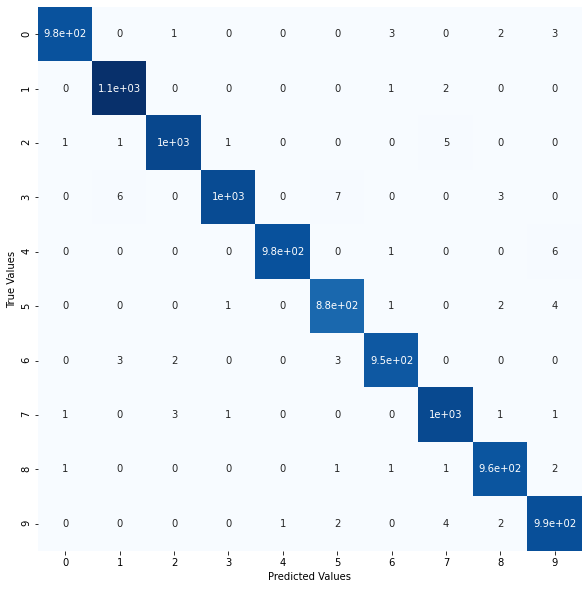

In [11]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

es bloque para sacar la ROC, hay algo mal con Y_test y el formato de los argumetnos de roc_curve

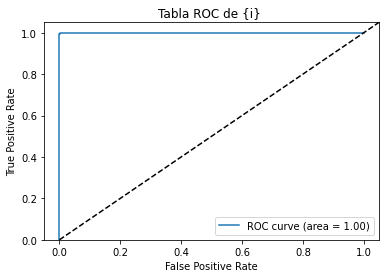

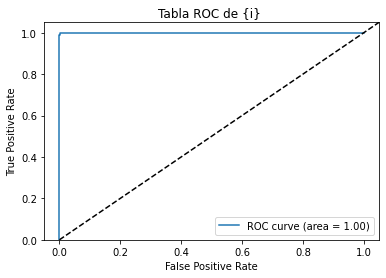

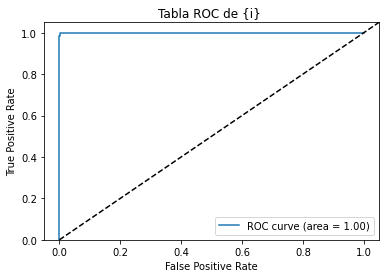

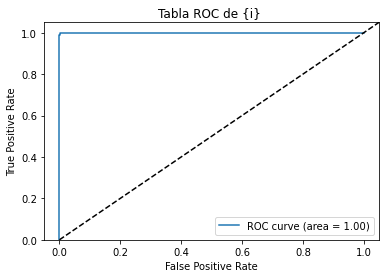

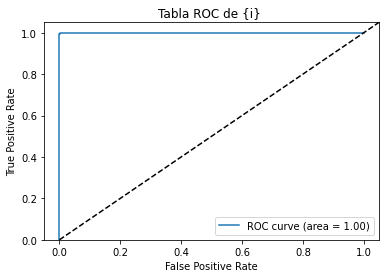

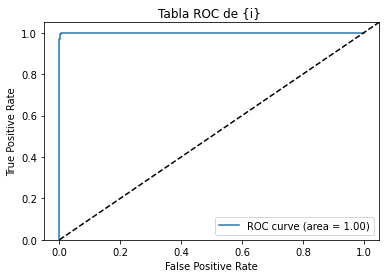

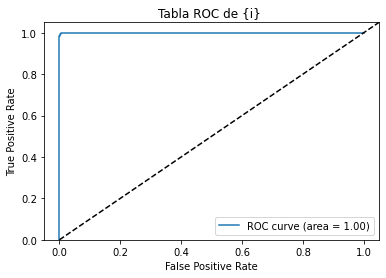

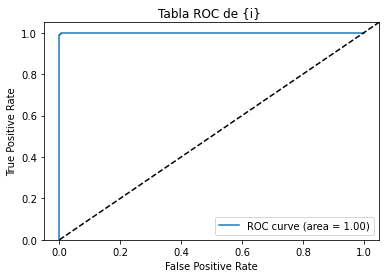

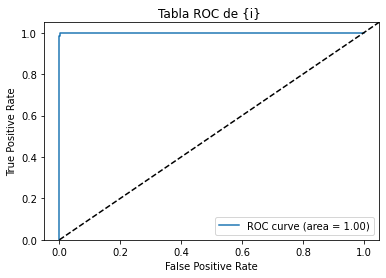

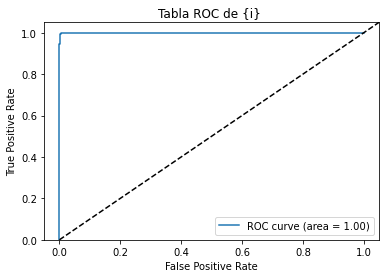

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
#Para el validation y accuracy...
history = model.fit(train_images, train_labels, 
                    epochs = 5, 
                    batch_size=64, 
                    validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0334 - val_accuracy: 0.9909
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0318 - val_accuracy: 0.9910
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0260 - val_accuracy: 0.9931
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0296 - val_accuracy: 0.9933
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0344 - val_accuracy: 0.9927


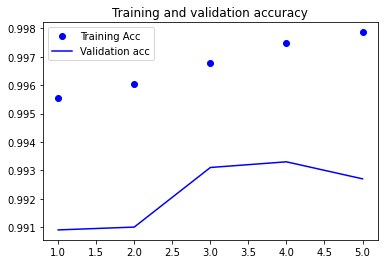

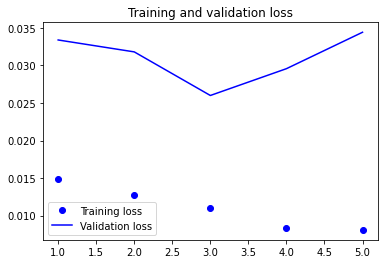

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## resultados

Los resultados nos muestran accuracy muy alto y mas que el de unan red neuronal convencional. Las diferencias en porcentaje no son tan grandes pero  De acuerdo con el reporte de clasificación, no hay tanta diferencia entre la precisión de cada dígito. Tenemos el 3 con la precisión mas baja mientras que el 1 fue clasificado casi perfecto.

De acuerdo con la matriz de confusión, se puede observar como son muy pocos dígitos que se confunden. La red confunde el 5 con el 3 y el 9 con el 4 (este último se podría entender que son dígitos parecidos). 

Para la tabla de ROC, es difícil obervar detalles ya que la precisión es muy alta. Finalmente para las últimas tablas, se puede observar un poco de overfitting (pero observando los valores de accuracy son muy pequeños). La 2da grádfica también indica un poco de overfitting y es mas fácil de observar que en la primera gráfica.

# Versión con dropout

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [56]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2957 - accuracy: 0.9083
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0939 - accuracy: 0.9731
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0695 - accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 19s 21ms/step - loss: 0.0576 - accuracy: 0.9834
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0509 - accuracy: 0.9857


In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0239 - accuracy: 0.9923


In [59]:
test_acc

0.9922999739646912

In [60]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.987879  0.997959  0.992893       980
           1   0.994732  0.998238  0.996482      1135
           2   0.984674  0.996124  0.990366      1032
           3   0.992095  0.994059  0.993076      1010
           4   0.993871  0.990835  0.992351       982
           5   0.995480  0.987668  0.991559       892
           6   0.998947  0.990605  0.994759       958
           7   0.990244  0.987354  0.988797      1028
           8   0.998962  0.987680  0.993289       974
           9   0.987167  0.991080  0.989120      1009

    accuracy                       0.992300     10000
   macro avg   0.992405  0.992160  0.992269     10000
weighted avg   0.992329  0.992300  0.992301     10000



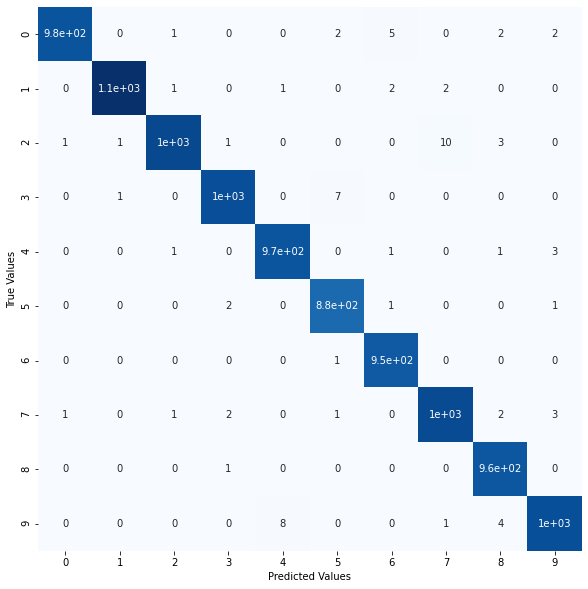

In [61]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

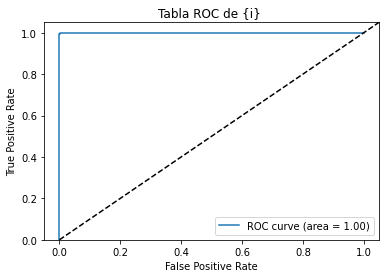

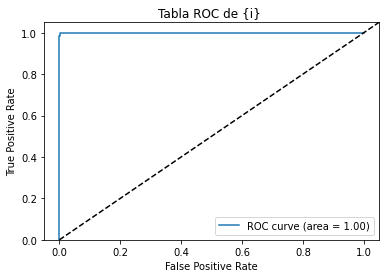

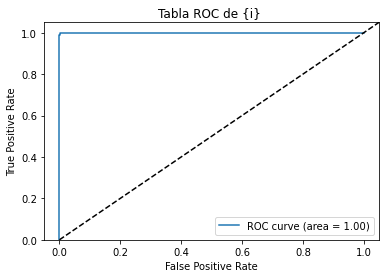

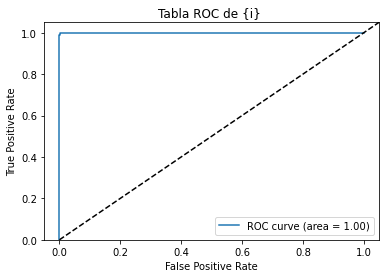

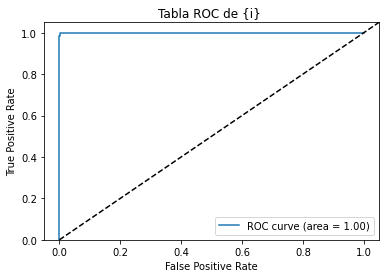

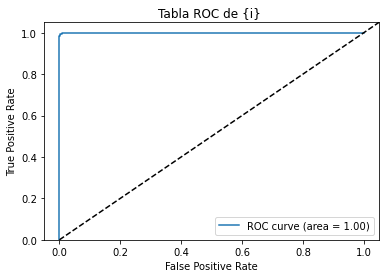

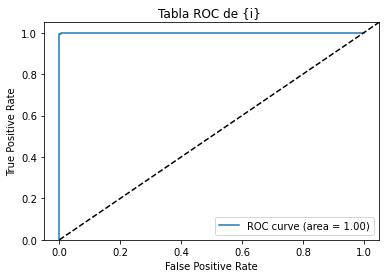

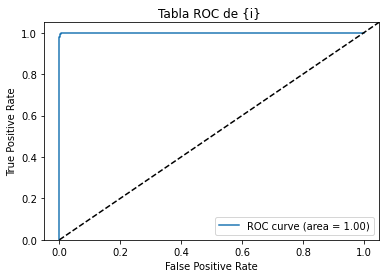

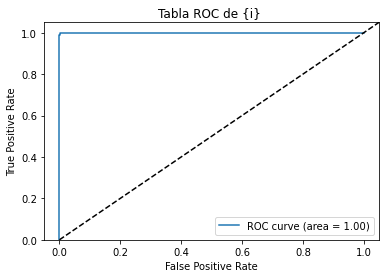

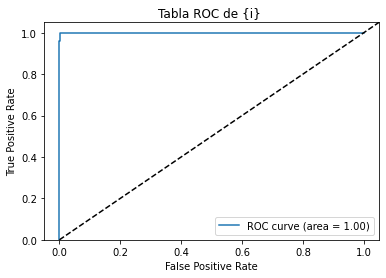

In [62]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

In [63]:
#Para el validation y accuracy...
history = model.fit(train_images, train_labels, 
                    epochs = 5, 
                    batch_size=64, 
                    validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0470 - accuracy: 0.9869 - val_loss: 0.0251 - val_accuracy: 0.9918
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0464 - accuracy: 0.9873 - val_loss: 0.0265 - val_accuracy: 0.9920
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0453 - accuracy: 0.9878 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0434 - accuracy: 0.9883 - val_loss: 0.0324 - val_accuracy: 0.9913
Epoch 5/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0457 - accuracy: 0.9884 - val_loss: 0.0299 - val_accuracy: 0.9914


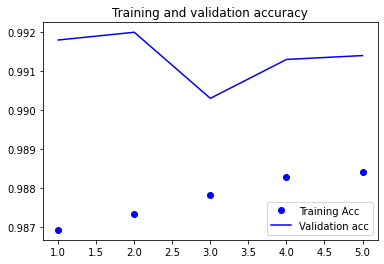

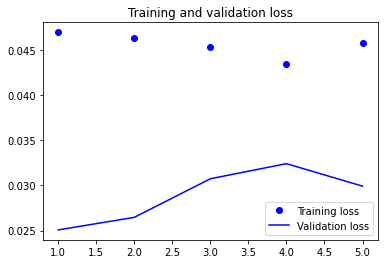

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Resultados

Cuando se implementa dropout, la precisión es muy parecida, sin embargo hay diferencias al medir los resultados. Empezando por la matriz de confusión, se puede ver que el 7 se confunde con el 2 mas que otros. Puede que cambie gracias al dropout si se entrena nuevamente. Las tablas de ROC se parecen mucho entre ellas (incluyendo la del 7). Muestra que la red fue muy buena catalogando pero no nos dice mas detalle. 

Finalmente, las últimas dos gráficas ya muestran diferencias notables con al red sin regularización ya que aquí no se puede ver overfitting. Aunque la diferencia tampoco es muy grande, se puede ver que el traiing accuracy no es mayor que el del conjunto de validación. Lo mismo sucede con la 2da gráfica, no podemos ver el training loss bajando.

A comparación de la pimera red, aunque no hay diferencias en precisión, aquí no se puede observar un overfitting claro.


# Versión con regularización

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 1.5046 - accuracy: 0.8373
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.6448 - accuracy: 0.9329
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5649 - accuracy: 0.9499
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5247 - accuracy: 0.9576
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5020 - accuracy: 0.9609


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5270 - accuracy: 0.9526


In [28]:
test_acc

0.9526000022888184

In [29]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.975831  0.988776  0.982261       980
           1   0.998999  0.879295  0.935333      1135
           2   0.970559  0.958333  0.964408      1032
           3   0.958416  0.958416  0.958416      1010
           4   0.983281  0.958248  0.970603       982
           5   0.961926  0.963004  0.962465       892
           6   0.972917  0.974948  0.973931       958
           7   0.967520  0.956226  0.961840      1028
           8   0.798165  0.982546  0.880810       974
           9   0.972746  0.919722  0.945492      1009

    accuracy                       0.952600     10000
   macro avg   0.956036  0.953951  0.953556     10000
weighted avg   0.956899  0.952600  0.953284     10000



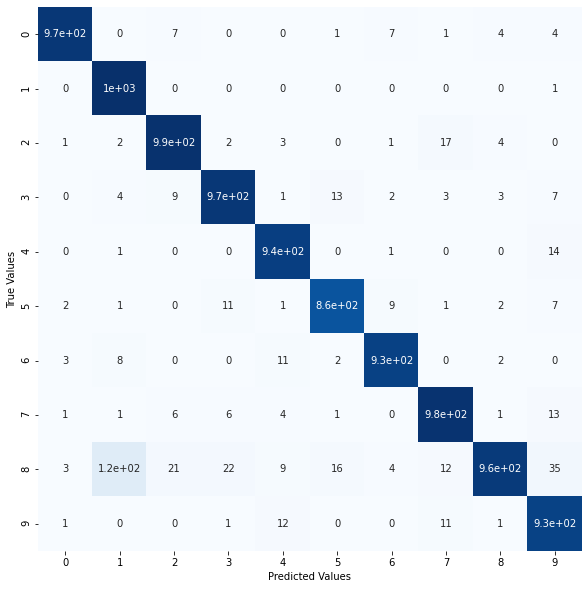

In [30]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

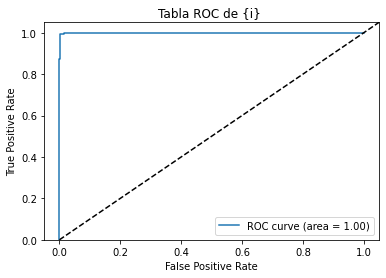

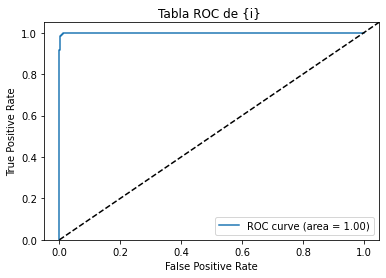

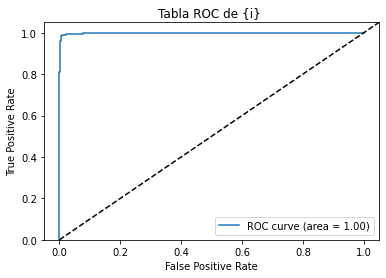

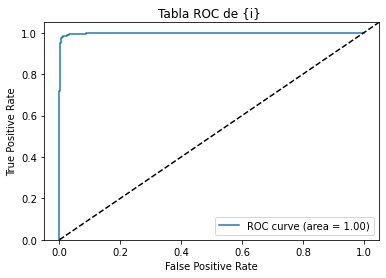

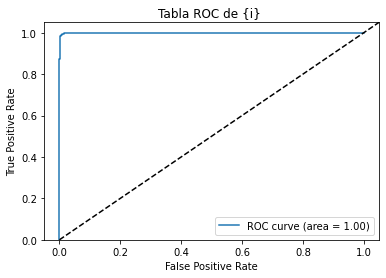

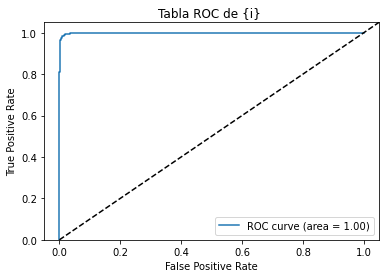

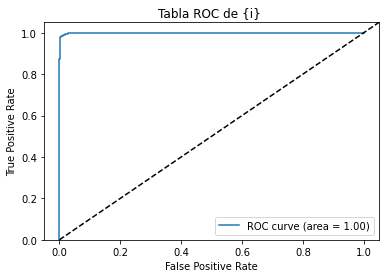

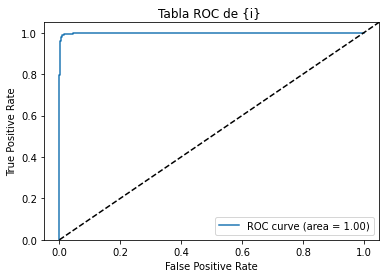

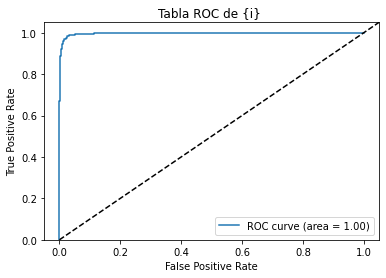

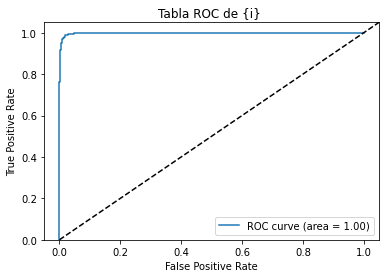

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

In [32]:
#Para el validation y accuracy...
history = model.fit(train_images, train_labels, 
                    epochs = 5, 
                    batch_size=64, 
                    validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.4844 - accuracy: 0.9638 - val_loss: 0.4555 - val_accuracy: 0.9699
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.4710 - accuracy: 0.9660 - val_loss: 0.4797 - val_accuracy: 0.9628
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.4606 - accuracy: 0.9671 - val_loss: 0.4506 - val_accuracy: 0.9695
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.4526 - accuracy: 0.9687 - val_loss: 0.4359 - val_accuracy: 0.9734
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.4472 - accuracy: 0.9693 - val_loss: 0.4289 - val_accuracy: 0.9736


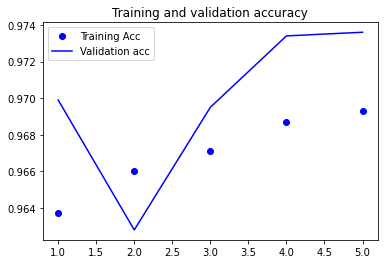

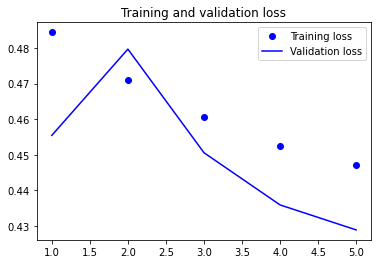

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Resultados

Al usar regularización, tenemos resultados mas diferentes a comparación de las otras 2 redes. La precisión del model baja a 95%. Ahora tnemos al modelo confundiendo un 8 con el 2 (se puede ver en la matriz de confusión), que da un golpa muy grande a la precsiión del 8, cuando antes la presición no variaba tanto entre dígitos.

Para las tablas de ROC, se pueden ver diferencias mas sutiles pero aun son pequeñas. Pero reflejan la baja de precisión. Afortunadamente, no parece haber overfitting. Pero parece que si se entrena la red con mas epochs, si podría haber overfitting, el training accuracy parece ir creciendo un poco mas rápido que el validation accuracy (pero no es seguro que esas tendencias sigan). 

# Versión con dropout y regularización

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))

In [35]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 1.7248 - accuracy: 0.7491
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.8706 - accuracy: 0.8772
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.7642 - accuracy: 0.9066
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.7091 - accuracy: 0.9186
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.6769 - accuracy: 0.9248


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5477 - accuracy: 0.9618


In [38]:
test_acc

0.9617999792098999

In [39]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.961348  0.989796  0.975365       980
           1   0.973253  0.993833  0.983435      1135
           2   0.947318  0.958333  0.952794      1032
           3   0.962739  0.946535  0.954568      1010
           4   0.990415  0.947047  0.968246       982
           5   0.957494  0.959641  0.958567       892
           6   0.952236  0.978079  0.964985       958
           7   0.953713  0.962062  0.957869      1028
           8   0.966209  0.939425  0.952629       974
           9   0.953722  0.939544  0.946580      1009

    accuracy                       0.961800     10000
   macro avg   0.961845  0.961430  0.961504     10000
weighted avg   0.961949  0.961800  0.961742     10000



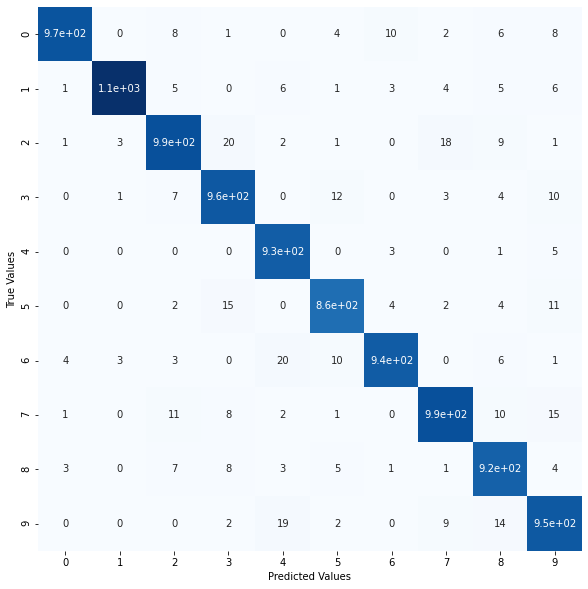

In [40]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

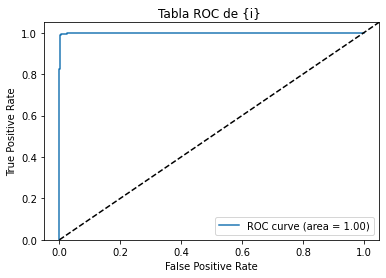

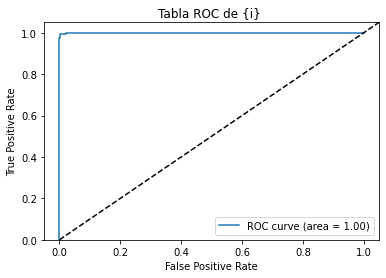

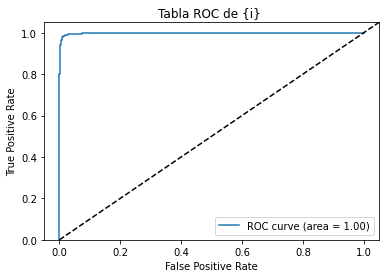

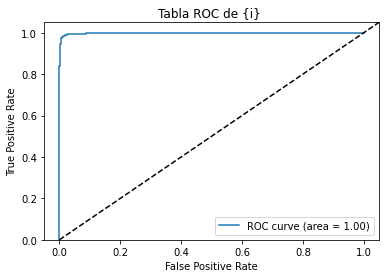

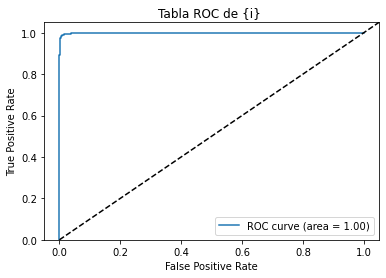

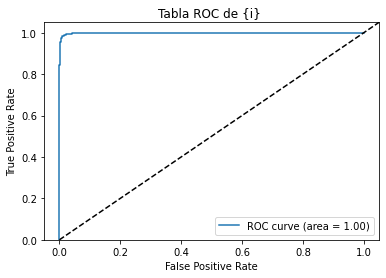

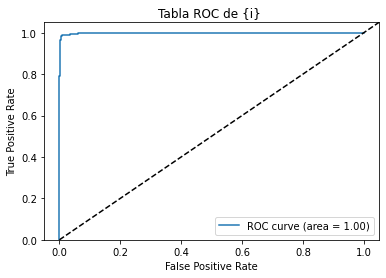

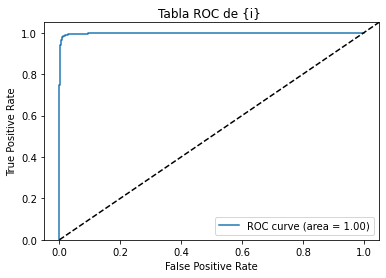

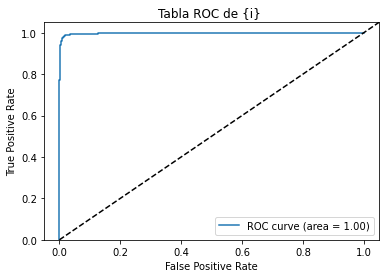

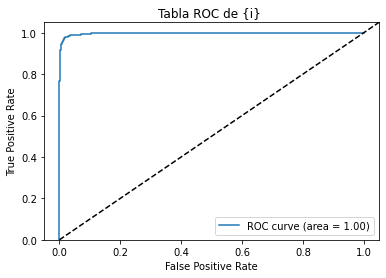

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

In [42]:
#Para el validation y accuracy...
history = model.fit(train_images, train_labels, 
                    epochs = 5, 
                    batch_size=64, 
                    validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 20s 22ms/step - loss: 0.6564 - accuracy: 0.9293 - val_loss: 0.5513 - val_accuracy: 0.9583
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.6372 - accuracy: 0.9328 - val_loss: 0.5192 - val_accuracy: 0.9665
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.6238 - accuracy: 0.9344 - val_loss: 0.5052 - val_accuracy: 0.9679
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.6120 - accuracy: 0.9370 - val_loss: 0.4966 - val_accuracy: 0.9685
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.6047 - accuracy: 0.9384 - val_loss: 0.4969 - val_accuracy: 0.9692


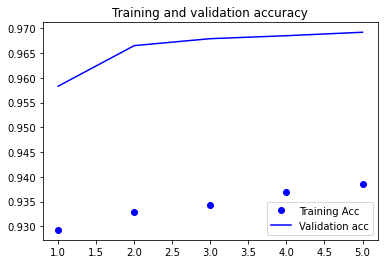

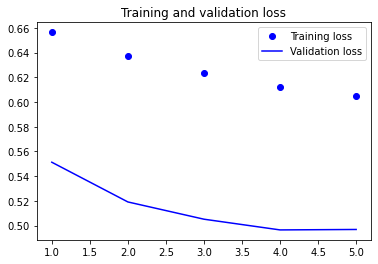

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Resultados

Usar ambos hiperparámetros parece ser lo que mejores resultados rinde, es la red que mejor reduce overfitting y no sacrifica mucha precisión. El accuracy sube un poco mas que con regularización, sin embargo, ya no tenemos un dígito que sea mucho peor clasificado que los demás y los errores están distribuidos de una forma mas uniforme (como lo indica la matriz de confusión). 

Las tablas de ROC se ven muy similares entre sí y sucede lo mismo que con las otras redes (difícil de distinguir detalles gracias a un accuracy alto). Finalmente, las gráficas muestran el menor overfitting de las redes anteriores. El validation accuracy es mayor con la diferencia mas grande (buena señal de que no hay overfitting). Para la 2da gráfica, parece que si agregamos mas epochs, el training loss podría ser demasiado bajo, pero con tan solo 5, conseguimios buenos resultados. 

# Con Adam 

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))

In [8]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 21ms/step - loss: 1.6441 - accuracy: 0.7587
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.6468 - accuracy: 0.8641
Epoch 3/5
938/938 [==============================] - 20s 22ms/step - loss: 0.5873 - accuracy: 0.8824
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.5537 - accuracy: 0.8901
Epoch 5/5
938/938 [==============================] - 19s 21ms/step - loss: 0.5354 - accuracy: 0.8957


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3885 - accuracy: 0.9411


In [11]:
test_acc

0.941100001335144

In [12]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0   0.964072  0.985714  0.974773       980
           1   0.988444  0.979736  0.984071      1135
           2   0.935910  0.962209  0.948877      1032
           3   0.910521  0.916832  0.913666      1010
           4   0.975446  0.890020  0.930777       982
           5   0.925592  0.920404  0.922990       892
           6   0.966066  0.950939  0.958443       958
           7   0.942774  0.945525  0.944148      1028
           8   0.918135  0.909651  0.913873       974
           9   0.885368  0.941526  0.912584      1009

    accuracy                       0.941100     10000
   macro avg   0

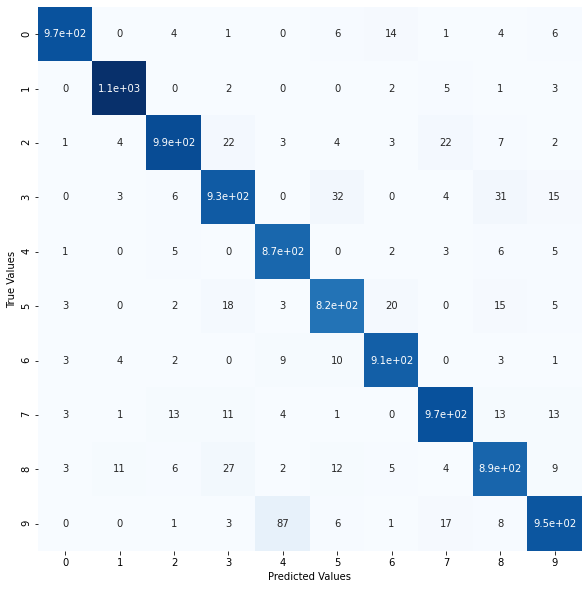

In [13]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

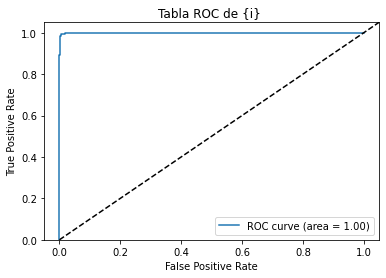

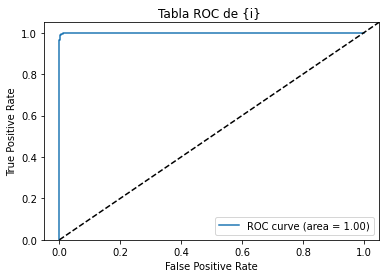

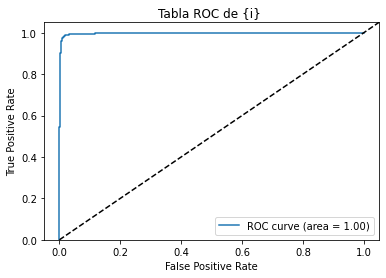

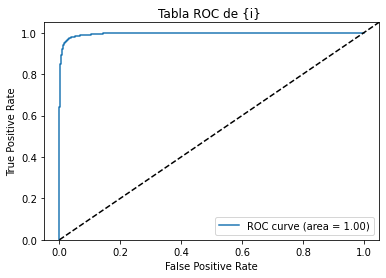

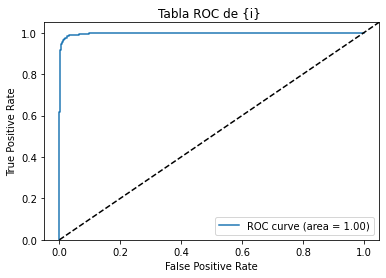

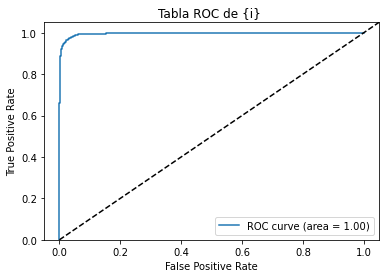

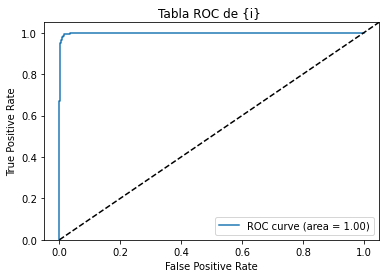

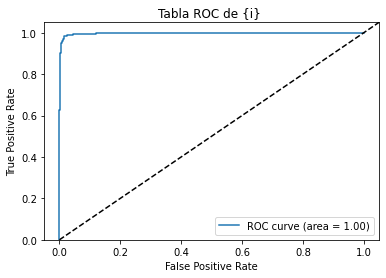

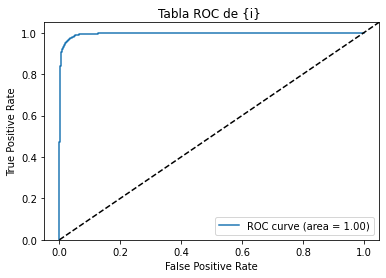

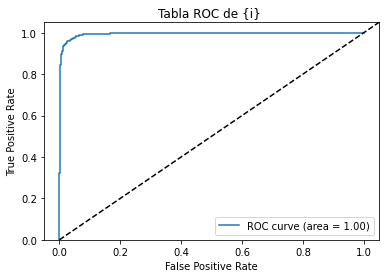

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

In [15]:
#Para el validation y accuracy...
history = model.fit(train_images, train_labels, 
                    epochs = 5, 
                    batch_size=64, 
                    validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 21s 23ms/step - loss: 0.5219 - accuracy: 0.8986 - val_loss: 0.3697 - val_accuracy: 0.9409
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.5153 - accuracy: 0.9001 - val_loss: 0.3553 - val_accuracy: 0.9446
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.5000 - accuracy: 0.9023 - val_loss: 0.3594 - val_accuracy: 0.9469
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.4995 - accuracy: 0.9046 - val_loss: 0.3537 - val_accuracy: 0.9474
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.4898 - accuracy: 0.9063 - val_loss: 0.3448 - val_accuracy: 0.9490


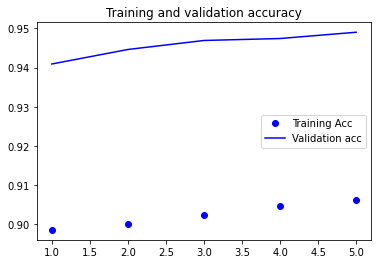

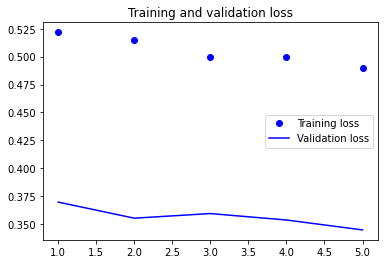

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Resultados

Los resultados apuntan a que reemplazar el optimizador por adam no fueron tan buenos a comparación de la red pasada (que incluye dropout y regularización). Aunque tampoco tenemos overfitting como lo indican las últimas 2 gráficas. Incluso son bastante similares. Las diferencias se aprecian mas en la matriz de confusión, que tiene mas errores y también errores mas pronunciados (se ve en el 9 confundido por el 4 84 veces). 

Podemos ver que estos hiperparámetros si causan una disminucaión notable en overfitting. Implementarlos si es mejor opción a no usarlos, incluso si el accuracy no sea tan alto. Para comparar la eficiencia de cada hiperparámetro de forma mas precisa, se podrían realizar pruebas con diferentes valores de cada uno. 

Un buen seguimiento para estas pruebas podría ser aumentar el número de epochas para analizar si las tendencias que fueron mencionadas anteriormetne siguen. 